# Project 2 - Startups Analysis
---
### For an educational Purpose
##### <u><b>Objective</b> : Data Cleaning & EDA & Data Analysis & Visualization</u>

<b>Mini-project by Patcharanat Pattanaporn (ken)</b><br>

Dataset : <br>

2022 Startups Dataset
* 'Startups.csv'<br>

Best Cities and Countries for Startups (2021)
* 'Best Cities for Startups.csv'
* 'Best Countries for Startups.csv'

Data Source :
* [Link to Kaggle : 2022 Startups Dataset](https://www.kaggle.com/khaiid/startups-by-valuation?select=Startups.csv)
* [Link to Kaggle : Best Cities and Countries for Startups (2021)](https://www.kaggle.com/ramjasmaurya/best-cities-and-countries-for-startups-in-2021)

> First, Import Modules, and Load Data

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

In [151]:
df_st = pd.read_csv('Startups.csv')

In [152]:
print("df_st shape = " + str(df_st.shape))
print("df_st_city shape = " + str(df_st.shape))
print("df_st_country shape = " + str(df_st.shape))
# (total rows, total columns)

df_st shape = (250, 5)
df_st_city shape = (250, 5)
df_st_country shape = (250, 5)


> This part is about Data Cleaning

In [153]:
print(df_st.isna().values.any())
print(df_st_city.isna().values.any())
print(df_st_country.isna().values.any())
# All DataFrames have null values

True
True
True


In [154]:
df_st.isna().sum()
# In 250 rows, There are 'na' in 27 rows in column 'Industry'

Company            0
Valuation          0
Valuation_date     0
Industry          17
Country            0
dtype: int64

In [155]:
df_st_city.isna().sum()
# In 1000 rows, There are 'na' in 202 rows

position                          0
change_in_position_from_2020      0
city                              0
country                           0
total_score                       0
quatity_score                     0
quality_score                     0
business_score                    0
sign_of_change_in_position      202
dtype: int64

In [156]:
df_st_country.isna().sum()

ranking                          1
change_in_position_from_2020     1
country                          1
total_score                      1
quantity_score                   1
quality_score                    1
business_score                   1
change_in_position_sign         22
dtype: int64

> Trying to clean up the datasets

In [157]:
condition1 = df_st.isna().any(axis=1)
df_st[condition1]
# Locating all rows having null value

,Company,Valuation,Valuation_date,Industry,Country
29,GoodLeap,12.00,October-21,NaN,United States
97,Thrasio,5.00,October-21,NaN,United States
109,Checkr,4.60,August-21,NaN,United States
134,Patreon,4.00,April-21,NaN,United States
143,VAST Data,3.70,May-21,NaN,United States
145,Shouqi,3.55,December-16,NaN,China
170,SentinelOne,3.10,November-20,NaN,United States
195,VANCL,3.00,February-14,NaN,China
198,Wefox,3.00,June-21,NaN,Germany
199,Yixia Technology,3.00,November-16,NaN,China


In [158]:
condition2 = df_st_city.isna().any(axis=1)
df_st_city[condition2]
# NaN means of no changing position, so no need to be cleaned up.
# 'quatity' is misspelled, thus change to 'quantity'

,position,change_in_position_from_2020,city,country,total_score,quatity_score,quality_score,business_score,sign_of_change_in_position
0,1,0,San Francisco Bay,United States,328.966,29.14,296.02,3.80,NaN
1,2,0,New York,United States,110.777,11.43,95.55,3.80,NaN
8,9,0,Moscow,Russia,25.401,7.37,15.64,2.39,NaN
37,38,0,Munich,Germany,11.769,1.80,6.47,3.49,NaN
65,66,0,Tallinn,Estonia,6.888,1.14,2.44,3.31,NaN
...,...,...,...,...,...,...,...,...,...
992,993,new,Chattogram,Bangladesh,0.064,0.01,0.02,0.03,NaN
994,995,new,Cotonou,Benin,0.061,0.01,0.02,0.03,NaN
996,997,new,Baghdad,Iraq,0.058,0.01,0.02,0.03,NaN
998,999,new,Conakry,Guinea,0.047,0.01,0.02,0.02,NaN


In [159]:
df_st_city.columns = df_st_city.columns.str.strip()
df_st_city.columns = df_st_city.columns.str.replace(' ', '_')

df_st_country.columns = df_st_country.columns.str.strip()
df_st_country.columns = df_st_country.columns.str.replace(' ', '_')
# Thanks to @chandanarprasad on Kaggle.com

In [160]:
df_st_city_new = df_st_city.rename(columns={'quatity_score':'quantity_score', 'position':'ranking'})
df_st_city_new
# Rename columns to match df_st_country's format

,ranking,change_in_position_from_2020,city,country,total_score,quantity_score,quality_score,business_score,sign_of_change_in_position
0,1,0,San Francisco Bay,United States,328.966,29.14,296.02,3.80,NaN
1,2,0,New York,United States,110.777,11.43,95.55,3.80,NaN
2,3,3,Beijing,China,66.049,5.01,58.61,2.43,+
3,4,1,Los Angeles Area,United States,58.441,11.23,43.41,3.80,+
4,5,2,London,United Kingdom,56.913,15.77,37.44,3.70,-
...,...,...,...,...,...,...,...,...,...
995,996,26,Ouagadougou,Burkina Faso,0.060,0.02,0.02,0.02,-
996,997,new,Baghdad,Iraq,0.058,0.01,0.02,0.03,NaN
997,998,13,Mbabane,Swaziland,0.057,0.01,0.02,0.03,-
998,999,new,Conakry,Guinea,0.047,0.01,0.02,0.02,NaN


In [161]:
condition3 = df_st_country.isna().any(axis=1)
df_st_country[condition3]
# Locating all rows having null value(s)

,ranking,change_in_position_from_2020,country,total_score,quantity_score,quality_score,business_score,change_in_position_sign
0,1.0,0,United States,124.420,19.45,101.17,3.80,NaN
1,2.0,0,United Kingdom,28.719,8.16,16.86,3.70,NaN
2,3.0,0,Israel,27.741,5.48,19.14,3.13,NaN
3,4.0,0,Canada,19.876,6.58,9.75,3.55,NaN
4,5.0,0,Germany,17.053,3.64,9.93,3.49,NaN
7,8.0,0,Switzerland,14.943,3.82,7.58,3.54,NaN
11,12.0,0,France,13.286,3.03,6.85,3.41,NaN
16,17.0,0,Russia,9.813,2.17,5.14,2.51,NaN
17,18.0,0,Ireland,9.633,2.51,3.68,3.44,NaN
18,19.0,0,South Korea,8.888,0.68,4.96,3.24,NaN


In [162]:
df_st_country_new = df_st_country.dropna(how='all')
# clean up 1 column as df_st_country_new. With the same reason in 'df_st_city',thus no need to worry about other NaN as well.

df_st_country_new = df_st_country_new.rename(columns={'change_in_position_sign':'sign_of_change_in_position'})
df_st_country_new = df_st_country_new.astype({'ranking':int})
# make it match with df_st_country_new's format e.g. columns name, element type(ranking column)

df_st_country_new

,ranking,change_in_position_from_2020,country,total_score,quantity_score,quality_score,business_score,sign_of_change_in_position
0,1,0,United States,124.420,19.45,101.17,3.80,NaN
1,2,0,United Kingdom,28.719,8.16,16.86,3.70,NaN
2,3,0,Israel,27.741,5.48,19.14,3.13,NaN
3,4,0,Canada,19.876,6.58,9.75,3.55,NaN
4,5,0,Germany,17.053,3.64,9.93,3.49,NaN
...,...,...,...,...,...,...,...,...
95,96,18,Dominican Republic,0.197,0.06,0.04,0.09,-
96,97,8,Uganda,0.180,0.07,0.04,0.07,-
97,98,2,Nepal,0.172,0.06,0.04,0.08,+
98,99,new entry,Namibia,0.165,0.04,0.05,0.07,NaN


> At this point, we finished on basic data cleaning(?).<br>
The next part is about EDA, and Data Analysis, then we will export new DataFrames <br>(only __df_st_city_new__ and __df_st_country_new__) into new csv applied in Tableau.

#### The first part is about Startups in 2022

(EDA, a little more Data Cleaning, Data Analysis, pandas visualization)

In [163]:
df_st.index = list(range(1,251))
df_st
# Indicate new index for DataFrame which stand for their ranks.

,Company,Valuation,Valuation_date,Industry,Country
1,ByteDance,140.00,April-21,Internet,China
2,SpaceX,100.00,October-21,Aerospace,United States
3,Stripe,95.00,March-21,Financial services,United States / Ireland
4,Klarna,45.60,June-21,Fintech,Sweden
5,Canva,40.00,September-21,Graphic design,Australia
...,...,...,...,...,...
246,Bitso,2.20,May-21,Cryptocurrency,Mexico
247,Gympass,2.20,June-21,NaN,Brazil / United States
248,Kurly,2.20,July-21,E-commerce,South Korea
249,Addepar,2.17,June-21,Fintech,United States


In [164]:
df_st.describe().round(4)

,Valuation
count,250.0000
mean,7.8208
std,13.4658
min,2.1000
25%,3.0000
50%,4.0250
75%,7.4000
max,140.0000


> From basic statistics above, we can see from<br>
* Mean = 7.82
* STD = 13.466
* (min,max) = (2.1, 140)<br>

We can assume there's an extremely large gap between successful startup companies and typical startup companies.

In [165]:
df_st['Country'].value_counts().head(15)
# Data is still not cleaned
# ("United States" and " United states" is counted as distinct)
# Spaces after '/' make it count a mistake values.

 United States              87
  United States             27
 India                      21
 China                      21
 United Kingdom              7
  India                      6
 Canada                      6
  China                      5
 Germany                     5
  United Kingdom             4
  South Korea                3
 Brazil                      3
 Israel /  United States     3
 France                      3
 South Korea                 3
Name: Country, dtype: int64

In [175]:
df_st['Country'] = df_st['Country'].str.strip().str.split().str.join(' ')
df_st['Country'].value_counts().head(20)
# More Data Cleaning

United States               114
India                        27
China                        26
United Kingdom               11
Germany                       6
South Korea                   6
Canada                        6
France                        5
Israel / United States        4
Indonesia                     3
Brazil                        3
Israel                        3
Mexico                        2
India / United States         2
Netherlands                   2
France / United States        2
Portugal / United States      2
Argentina                     2
Sweden                        2
Belgium                       2
Name: Country, dtype: int64

In [167]:
df_st['Industry'].value_counts()

Fintech                    24
Software                   23
E-commerce                 15
Artificial intelligence    10
Financial services          9
                           ..
Ghost kitchen               1
Electronic Cigarettes       1
Flexible electronics        1
Defense Technology          1
Personal finance            1
Name: Industry, Length: 81, dtype: int64

From above, FinTech and Software Industry (Both are about Technology) are quite popular for startup.<br>

In [168]:
df_st.groupby('Industry')['Valuation'].sum().sort_values(ascending=False)

Industry
Fintech                 180.97
Financial services      173.90
Internet                173.00
Software                161.81
E-commerce              125.74
                         ...  
Cloud communications      3.00
Home improvement          2.80
Trucking                  2.75
CRM                       2.63
Personal finance          2.45
Name: Valuation, Length: 81, dtype: float64

From above, Technology Innovation is the most successful Industry.

<AxesSubplot:title={'center':'Mean of Valuation groupby Industry'}, xlabel='Industry', ylabel='USD$ in billions'>

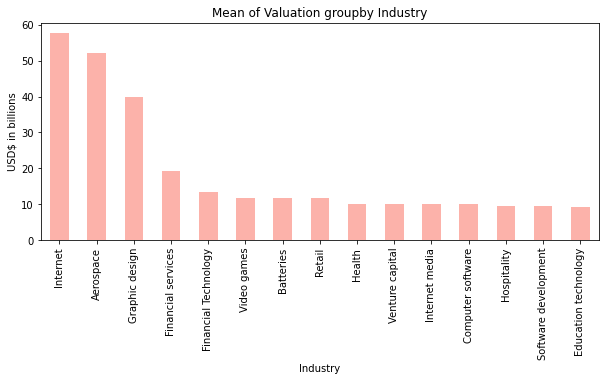

In [169]:
x = df_st.groupby('Industry')['Valuation'].mean().round(2).sort_values(ascending=False)
x.head(15).plot.bar(figsize=(10,4), color='salmon', alpha=0.6,
                    ylabel='USD$ in billions', title='Mean of Valuation groupby Industry')

As you can see from the chart, FinTech is gone (not even on top 15 Industries).<br>
It means There's a lot of FinTech companies but only a few companies is successful.

<AxesSubplot:title={'center':'Mean of Valuation groupby Country'}, xlabel='Country', ylabel='USD$ in billions'>

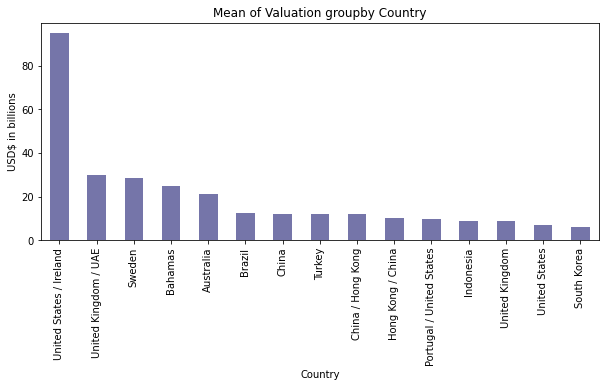

In [170]:
x = df_st.groupby('Country')['Valuation'].mean().round(2).sort_values(ascending=False)
x.head(15).plot.bar(figsize=(10,4), color='midnightblue', alpha=0.6,
                    ylabel='USD$ in billions', title='Mean of Valuation groupby Country')

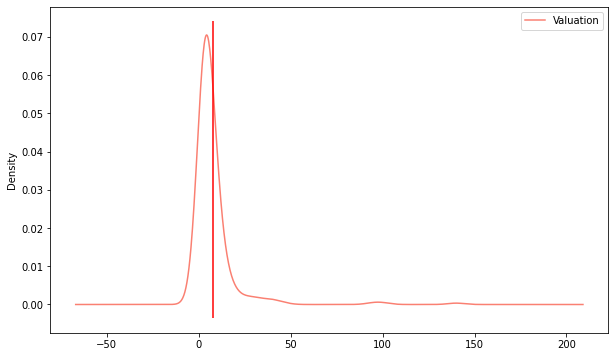

In [171]:
ax = df_st.plot(kind='kde', color='salmon', figsize=(10,6))
ymin, ymax = ax.get_ylim()
ax.vlines(df_st['Valuation'].mean(), ymin=ymin, ymax=ymax, color='red')

# Thanks to @TomAugspurger on stackoverflow.com

The next part is Analyzing 2021 cleaned datasets (df_st_city_new, df_st_country_new) 

In [172]:
df_st_city_new.head()

,ranking,change_in_position_from_2020,city,country,total_score,quantity_score,quality_score,business_score,sign_of_change_in_position
0,1,0,San Francisco Bay,United States,328.966,29.14,296.02,3.80,NaN
1,2,0,New York,United States,110.777,11.43,95.55,3.80,NaN
2,3,3,Beijing,China,66.049,5.01,58.61,2.43,+
3,4,1,Los Angeles Area,United States,58.441,11.23,43.41,3.80,+
4,5,2,London,United Kingdom,56.913,15.77,37.44,3.70,-


In [173]:
df_st_country_new.head()

,ranking,change_in_position_from_2020,country,total_score,quantity_score,quality_score,business_score,sign_of_change_in_position
0,1,0,United States,124.420,19.45,101.17,3.80,NaN
1,2,0,United Kingdom,28.719,8.16,16.86,3.70,NaN
2,3,0,Israel,27.741,5.48,19.14,3.13,NaN
3,4,0,Canada,19.876,6.58,9.75,3.55,NaN
4,5,0,Germany,17.053,3.64,9.93,3.49,NaN


## This project is ongoing.

The next part is exportation, then apply it on __Tableau__ to create Dashboard.

In [174]:
# df_st_city_new.to_csv('Best Cities for Startups_new.csv')
# df_st_country_new.to_csv('Best Countries for Startups_new.csv')